<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#План-работы" data-toc-modified-id="План-работы-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>План работы</a></span></li></ul></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Другой-способ-борьбы-с-дисбалансом" data-toc-modified-id="Другой-способ-борьбы-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Другой способ борьбы с дисбалансом</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Описание данных
Признаки
RowNumber — индекс строки в данных;
CustomerId — уникальный идентификатор клиента;
Surname — фамилия;
CreditScore — кредитный рейтинг;
Geography — страна проживания;
Gender — пол;
Age — возраст;
Tenure — сколько лет человек является клиентом банка;
Balance — баланс на счёте;
NumOfProducts — количество продуктов банка, используемых клиентом;
HasCrCard — наличие кредитной карты;
IsActiveMember — активность клиента;
EstimatedSalary — предполагаемая зарплата;
Целевой признак:
Exited — факт ухода клиента;
#### План работы
1.Загрузить и подготовить данные.

2.Исследовать баланс классов.

3.Обучить модель без учёта дисбаланса.

3.Улучшить качество модели, учитывая дисбаланс классов. Обучить разные модели и найди лучшую.

4.Провести финальное тестирование.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, recall_score, precision_score, roc_curve

In [2]:
from sklearn.utils import shuffle

In [3]:
data = pd.read_csv('/datasets/Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   
5     8.0  113755.78              2          1               0   
6     7.0       0.00              2          1               1   
7     4.0  115046.74              4          1               0   
8     4.0  142051.07              2          0               1   
9     2.0  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

In [5]:
data.duplicated().sum()

0

In [6]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>, <AxesSubplot:>]],
      dtype=object)

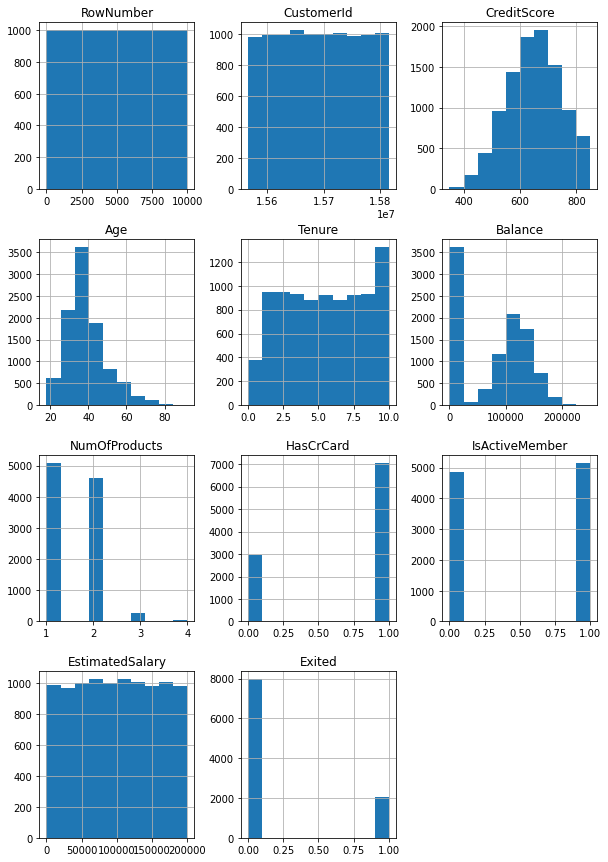

In [7]:
data.hist(figsize=(10,15))

По исходному дата-сету видно, что повторов нет, а вот пропуски в графе tenure есть, это нужно будет исправить. Также для столбцов Gender и Geography нужно будет применить one_hot_encoding. 
Также столбцы RowNumber, Surname, CustomerId нужно удалить, так как они не применимы для анализа.
Видно, что в столбце Exited присутствует сильный дисбаланс классов, в дальнейшем нужно будет масштабировать один из классов.

In [8]:
data_drop = ['RowNumber','CustomerId','Surname']

In [9]:
data = data.drop(data_drop, axis=1)

Заполним пропуски в Tenure нулями, так как, скорее всего, эти пользователи не являются клиентами банка.

In [10]:
data['Tenure'] = data['Tenure'].fillna(0)

In [11]:
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
data = pd.get_dummies(data, drop_first=True, columns=['Gender','Geography'])

In [13]:
data.head(10)

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42     2.0       0.00              1          1   
1          608   41     1.0   83807.86              1          0   
2          502   42     8.0  159660.80              3          1   
3          699   39     1.0       0.00              2          0   
4          850   43     2.0  125510.82              1          1   
5          645   44     8.0  113755.78              2          1   
6          822   50     7.0       0.00              2          1   
7          376   29     4.0  115046.74              4          1   
8          501   44     4.0  142051.07              2          0   
9          684   27     2.0  134603.88              1          1   

   IsActiveMember  EstimatedSalary  Exited  Gender_Male  Geography_Germany  \
0               1        101348.88       1            0                  0   
1               1        112542.58       0            0                  0   
2               0        113931.57       1            0                  0   
3               0         93826.63       0            0                  0   
4               1         79084.10       0            0                  0   
5               0        149756.71       1            1                  0   
6               1         10062.80       0            1                  0   
7               0        119346.88       1            0                  1   
8               1         74940.50       0            1                  0   
9               1         71725.73       0            1                  0   

   Geography_Spain  
0                0  
1                1  
2                0  
3                0  
4                1  
5                1  
6                0  
7                0  
8                0  
9                0

Теперь дата-сет готов для машинного обучения!

In [5]:
!pip install pandas-profiling[notebook]

     |████████████████████████████████| 324 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 357 kB 16.2 MB/s eta 0:00:01
     |████████████████████████████████| 679 kB 44.8 MB/s eta 0:00:01
     |████████████████████████████████| 460 kB 87.2 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 55.6 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 77.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 47.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 65.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 76.0 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=6e7c49e461d133b76f11bd7833879ba1d3ba18ffeb7ff769b0d2808f1468421a
  Stored in directory: /home/jovyan/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [6]:
import pandas_profiling

/tmp/ipykernel_63/1591302161.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [7]:
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Исследование задачи

Разобьем данные в данном процентном соотношении train:test = 0.8:0,2, где train разбиваем в соотношении 0.75 к 0.25 для обучения и валидации.

In [23]:
target = data['Exited']
features = data.drop('Exited', axis=1)
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                              target,
                                                                              test_size=0.2, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train,
                                                                              test_size=0.25, random_state=12345)

In [24]:
(len(target_train) / len(data))

0.6

In [25]:
len(target_test) / len(data)

0.2

In [18]:
best_model = 0
f1_best = 0
for depth in range(1,50):
    model_dtc = DecisionTreeClassifier(
        max_depth=depth,random_state=12345)
    model_dtc.fit(features_train,target_train)
    predicted_valid = model_dtc.predict(features_valid)
    f1_dtc = f1_score(target_valid, predicted_valid)
    if f1_dtc > f1_best:
        f1_best = f1_dtc
        best_depth = depth
print(print("f1 наилучшей модели на валидационной выборке:", f1_best, "Глубина дерева:", best_depth))        

f1 наилучшей модели на валидационной выборке: 0.5488958990536277 Глубина дерева: 7
None


In [49]:
best_model = None
f1_best = 0
for est in range(10, 160, 10):
    for depth in range(1, 30):
        model_rfc = RandomForestClassifier(random_state=12345,
                                              n_estimators=est, 
                                              max_depth=depth)
        model_rfc.fit(features_train, target_train)
        predicted_valid_rfc = model_rfc.predict(features_valid)
        f1_forest = f1_score(target_valid, predicted_valid_rfc)
        if f1_forest > f1_best:
            best_model = model_rfc
            best_est = est
            best_depth = depth
            f1_best = f1_forest

print('Оптимальное количество оценок =', best_est)
print('Оптимальная глубина дерева =', best_depth)
print('Качество модели - ', f1_forest)

Оптимальное количество оценок = 30
Оптимальная глубина дерева = 20
Качество модели -  0.5553772070626003


In [21]:
model_lr = LogisticRegression(solver='liblinear', random_state=12345)
model_lr.fit(features_train, target_train)
predicted_lr = model_lr.predict(features_valid)
f1_lr = f1_score(target_valid, predicted_lr)

In [22]:
print('Качество модели - ', f1_lr)

Качество модели -  0.10290827740492169


Для лучшей модели построим ROC кривую и посчитаем ROC-AUC

ROC-AUC: 0.8291364590800786


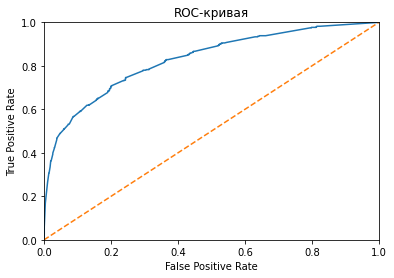

In [30]:
model_rfc = RandomForestClassifier(random_state=12345,
                                              n_estimators=30, 
                                              max_depth=20)
model_rfc.fit(features_train, target_train)
probabilities_valid = model_rfc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)
print('ROC-AUC:', roc_auc_score(target_valid, probabilities_one_valid))
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")

plt.show()

В результате первичного построения модели мы смогли добиться в лучшем случае качества модели по f1 в 0.55, roc-auc характеритика же имеет значение 0.829. Значение f1 не удовлетвоеряет минимальным требованиям задачи, поэтому в следующем этапе будем бороться с дисбалансом, чтобы улучшить метрику качества.

## Борьба с дисбалансом

In [32]:
def unsample(features, target, repeat):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    features_unsampled = pd.concat([features_zeros]+[features_ones]*repeat)
    target_unsampled = pd.concat([target_zeros]+[target_ones]*repeat)
    
    features_unsampled, target_unsampled = shuffle(features_unsampled, target_unsampled, random_state=12345)
    return features_unsampled, target_unsampled
    

В графе repeat укажем 4, так как количесвто 0 и 1 в Exited примерно 8000 и 2000 соответственно 

In [33]:
features_unsampled, target_unsampled = unsample(features_train, target_train, 4)

In [34]:
features_unsampled.shape

(9657, 11)

In [35]:
target_unsampled.shape

(9657,)

Разбивка прошла успешно.

In [38]:
best_model = None
f1_best_tree = 0
for depth in range(1,50):
    model_tree = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model_tree.fit(features_unsampled, target_unsampled)
    predicted_tree_valid = model_tree.predict(features_valid)
    f1_tree = f1_score(target_valid, predicted_tree_valid)
    if f1_tree > f1_best_tree:
        f1_best_tree = f1_tree
        best_depth = depth


In [40]:
print(print("f1 наилучшей модели на валидационной выборке:", f1_best_tree, "Глубина дерева:", best_depth))   

f1 наилучшей модели на валидационной выборке: 0.5572441742654509 Глубина дерева: 6
None


In [56]:
best_model = None
f1_best_forest = 0
for est in range(70,160,10):
    for depth in range(10,20):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_unsampled, target_unsampled)
        predicted_forest = model_forest.predict(features_valid)
        f1_forest = f1_score(target_valid, predicted_forest)
        if f1_forest>f1_best_forest:
            f1_best_forest = f1_forest
            best_model = model_forest
            best_est = est
            best_depth = depth
print('Оптимальное количество оценок =', best_est)
print('Оптимальная глубина дерева =', best_depth)
print('Качество модели - ', f1_best_forest)

Оптимальное количество оценок = 130
Оптимальная глубина дерева = 14
Качество модели -  0.6085825747724318


In [45]:
model_best_forest = RandomForestClassifier(random_state=12345, n_estimators=130, max_depth=14)
model_best_forest.fit(features_unsampled, target_unsampled)
predicted_best_forest = model_best_forest.predict(features_valid)
f1_best_forest = f1_score(target_valid, predicted_best_forest)
print("Recall:", recall_score(target_valid, predicted_best_forest))
print("Precision:", precision_score(target_valid, predicted_best_forest))
print("F1:", f1_score(target_valid, predicted_best_forest))

Recall: 0.59846547314578
Precision: 0.6190476190476191
F1: 0.6085825747724318


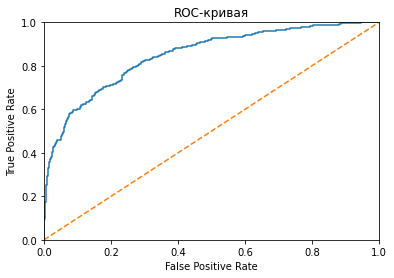

In [52]:
model = model_best_forest = RandomForestClassifier(random_state=12345, n_estimators=130, max_depth=14)
model.fit(features_unsampled, target_unsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")

plt.show()


In [46]:
model_log = LogisticRegression(random_state=12345,
                               solver='liblinear')
model_log.fit(features_unsampled, target_unsampled)
predictions_valid_log = model_log.predict(features_valid)

print("Recall:", recall_score(target_valid, predictions_valid_log))
print("Precision:", precision_score(target_valid, predictions_valid_log))
print("F1:", f1_score(target_valid, predictions_valid_log))

probabilities_valid = model_log.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC-AUC:", roc_auc_score(target_valid, probabilities_one_valid))

Recall_log: 0.7007672634271099
Precision_log: 0.3145809414466131
F1_log: 0.43423137876386686
ROC-AUC_log: 0.7170344561203843


Наилучшим образом показала себя модель метода случайного леса, перейдем к ее тестированию.

## Промежуточный вывод
метод upsampled показал себя лучше, чем downsample. Возможно, это связано с недостатком данных при методе downsampled. 
При upsampled показатель f1 достиг 0.608, а при downsampled 0.577. В обоих случаях лучшая модель - метод случайного леса.

## Тестирование модели

In [57]:
model_best_forest = RandomForestClassifier(random_state=12345, n_estimators=130, max_depth=14)
model_best_forest.fit(features_unsampled, target_unsampled)
predicted_best_forest = model_best_forest.predict(features_test)
f1_best_forest = f1_score(target_test, predicted_best_forest)
print("Recall:", recall_score(target_test, predicted_best_forest))
print("Precision:", precision_score(target_test, predicted_best_forest))
print("F1:", f1_score(target_test, predicted_best_forest))

Recall: 0.5971896955503513
Precision: 0.6439393939393939
F1: 0.6196840826245443


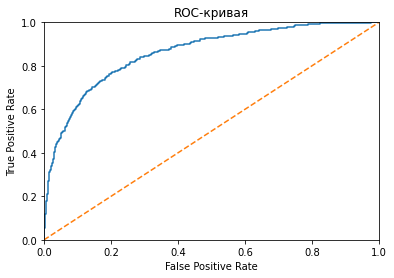

In [58]:
probabilities_test = model_best_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test,probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")

plt.show()

In [59]:
print("ROC-AUC_forest:", roc_auc_score(target_test, probabilities_one_test))

ROC-AUC_forest: 0.8603155413885667


## Вывод
В рамках исследования задачи влияния дисбаланса классов был получен дата-сет, для которого был проведен исследовательский анализ.
В процессе были обнаружены пропуски, ненужные столбцы, дисбаланс классов, а также столбцы, для которых нужно было сделать one_hot_encoding, чтобы можно было обучать модель на данном дата-сете.
До исправления дисбаланса классов были обучены модели, в результате чего выявлено, что модель случайного леса лучше справилась с задачей и показала качество модели по f1 0.55.

Для исправления дисбаланса лучше всего подошел метод upsampled, он показал себя лучше, чем downsamled. 10000 тысяч строк- не большой объем, а 2000 может не хватить для хорошего обучения.

После исправления дисбаланса лучше всего показала себя также модель с методом случайного леса.
Именно ее я и отправил на финальное тестирование, где показатель f1 дошел до 0.619 с изначальных 0.55. Результат с лихвой оправдал метод. метрика ROC-AUC достигла значения 0.86, довольно близко к 1. 